In [1]:
using LinearAlgebra, SparseArrays, Plots

In [54]:
n = 20
X = spdiagm(-1 => fill(0.5,n-1),1 => 1:n-1)
D = spdiagm(1 => 2*(1:n-1))
#eigvals(Matrix(X-D))
A  = X-D
d0 = 1
formn(n) = im^(n)*2^(n/2)*sqrt(factorial(n))*d0
dv = formn.(0:n-1)
#dv = [1,im*sqrt(2),-sqrt(2^2*factorial(2)),-im*sqrt(2^3*factorial(3))]
Dm = spdiagm(0 => dv)
Dmi = spdiagm(0 => 1 ./dv)
B = Dm*A*Dmi
@show norm(Symmetric(B)-B)
B[1:10,1:10]

norm(Symmetric(B) - B) = 2.2009313928704765e-15


10×10 SparseMatrixCSC{ComplexF64, Int64} with 18 stored entries:
     ⋅           -0.0+0.707107im  …      ⋅               ⋅    
 0.0+0.707107im       ⋅                  ⋅               ⋅    
     ⋅            0.0+1.0im              ⋅               ⋅    
     ⋅                ⋅                  ⋅               ⋅    
     ⋅                ⋅                  ⋅               ⋅    
     ⋅                ⋅           …      ⋅               ⋅    
     ⋅                ⋅                  ⋅               ⋅    
     ⋅                ⋅              0.0+2.0im           ⋅    
     ⋅                ⋅                  ⋅          -0.0+2.12132im
     ⋅                ⋅              0.0+2.12132im       ⋅    

In [57]:
maximum(abs.(eigvals(Matrix(Symmetric(B)))))

5.387480890011237

In [64]:
n = 21
factorial(big(n))

51090942171709440000

In [91]:
evs = [];
d0 = 1
formn(n) = im^(n)*2^(n/2)*sqrt(factorial(n))*d0
nv = 4:20
for n = nv
    X = spdiagm(-1 => fill(0.5,n-1),1 => 1:n-1)
    D = spdiagm(1 => 2*(1:n-1))
    dv = formn.(0:n-1)
    Dm = spdiagm(0 => dv)
    Dmi = spdiagm(0 => 1 ./dv)
    A  = X-D
    B = Dm*A*Dmi
    evs = [evs;maximum(abs.(eigvals(Matrix(Symmetric(B)))))]
end
Float64.(evs)

17-element Vector{Float64}:
 1.6506801238857847
 2.0201828704560865
 2.3506049736744936
 2.6519613568352343
 2.9306374202572436
 3.190993201781532
 3.436159118837739
 3.6684708465595883
 3.8897248978697863
 4.101337596178643
 4.30444857047363
 4.499990707309397
 4.688738939305818
 4.871345193674416
 5.048364008874469
 5.22027169053749
 5.387480890011237

sol[2] = 0.6170796153964413


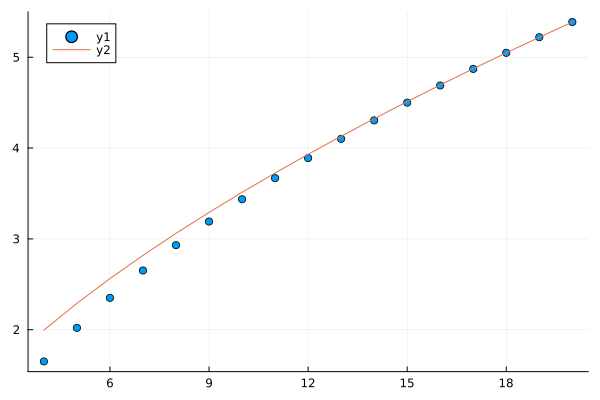

In [88]:
scatter(nv,evs)
#plot!(nv,0.5*nv .^(2/3))
inds = 15:17
sol = [ones(length(nv[inds])) log.(nv[inds])]\log.(evs[inds])
@show sol[2]
plot!(nv,exp(sol[1])*nv.^(sol[2]))

In [74]:
formn(big(30))

-5.336788261829003130650608718571966009967751500258030374305612802137908651638157e+20 + 0.0im

In [98]:
evs = [];
nv = 10:130
for n = nv
    X = spdiagm(-1 => fill(0.5,n-1),1 => 1:n-1)
    D = spdiagm(1 => 2*(1:n-1))
    A  = X-D
    evs = [evs;maximum(abs.(eigvals(Matrix(A))))]
end
Float64.(evs)

121-element Vector{Float64}:
  3.436159118837737
  3.6684708465595803
  3.8897248978697845
  4.101337596178637
  4.304448570473623
  4.499990707309386
  4.688738939305811
  4.871345193674405
  5.048364008874472
  5.220271690537483
  5.387480890011238
  5.550351873264677
  5.709201353205265
  ⋮
 14.965874402352442
 14.776657993625962
 15.020365314190041
 15.131935851948473
 15.188653851607354
 15.09791973233917
 15.690049285129358
 15.177226033273747
 15.319802125712608
 15.291819766578548
 15.377777211489187
 15.436813333628825

sol[2] = 0.5404137401760107


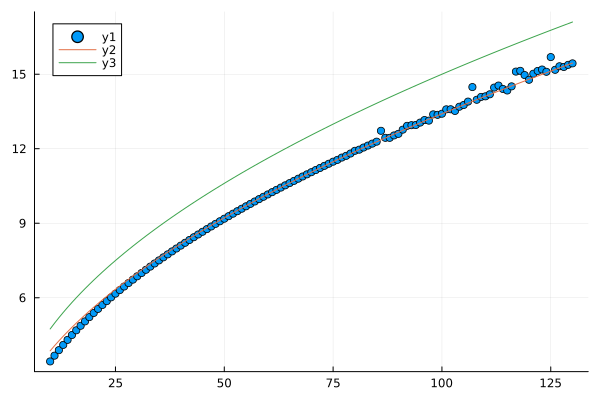

In [109]:
scatter(nv,evs)
inds = 60:70
sol = [ones(length(nv[inds])) log.(nv[inds])]\log.(evs[inds])
@show sol[2]
plot!(nv,exp(sol[1])*nv.^(sol[2]))
plot!(nv,1.5nv.^(0.5))